In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
#loading data

imdb_raw = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/imdb_raw.csv')
imdb_raw.head(2)

,Unnamed: 0,DVD,Production,actors,awards,country,director,genre,imdbID,imdbRating,...,tomatoMeter,tomatoRating,tomatoReviews,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,writer,year,Gross
0,0,27 Jul 1999,TriStar Pictures,"Kathleen Turner, Christopher Lloyd, Kim Cattra...",1 win & 2 nominations.,USA,Bob Clark,"Comedy, Crime, Family",tt0118665,2.5,...,2.0,1.9,44.0,43.0,23.0,2.5,82185.0,"Steven Paul (story), Francisca Matos (story), ...",1999,27141959.0
1,1,23 Nov 2004,Independent Pictures,"John Call, Leonard Hicks, Vincent Beck, Bill M...",NaN,USA,Nicholas Webster,"Adventure, Comedy, Family",tt0058548,2.5,...,25.0,2.8,20.0,15.0,27.0,2.1,5992.0,"Glenville Mareth (screenplay), Paul L. Jacobso...",1964,NaN


In [4]:
imdb_raw.drop(['Unnamed: 0'], axis=1, inplace=True)
imdb_raw.head(1)

,DVD,Production,actors,awards,country,director,genre,imdbID,imdbRating,imdbVotes,...,tomatoMeter,tomatoRating,tomatoReviews,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,writer,year,Gross
0,27 Jul 1999,TriStar Pictures,"Kathleen Turner, Christopher Lloyd, Kim Cattra...",1 win & 2 nominations.,USA,Bob Clark,"Comedy, Crime, Family",tt0118665,2.5,"19,205",...,2.0,1.9,44.0,43.0,23.0,2.5,82185.0,"Steven Paul (story), Francisca Matos (story), ...",1999,27141959.0


In [5]:
#looking at data

imdb_raw.dtypes

DVD                   object
Production            object
actors                object
awards                object
country               object
director              object
genre                 object
imdbID                object
imdbRating           float64
imdbVotes             object
language              object
metascore            float64
plot                  object
rating                object
released              object
runtime               object
title                 object
tomatoConsensus       object
tomatoFresh          float64
tomatoImage           object
tomatoMeter          float64
tomatoRating         float64
tomatoReviews        float64
tomatoRotten         float64
tomatoUserMeter      float64
tomatoUserRating     float64
tomatoUserReviews    float64
writer                object
year                   int64
Gross                float64
dtype: object

In [6]:
#checking for NaNs....I will decide how to handle NaNs on a per attribute basis....

print imdb_raw.info()
print 
imdb_raw.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 30 columns):
DVD                  309 non-null object
Production           306 non-null object
actors               345 non-null object
awards               280 non-null object
country              345 non-null object
director             345 non-null object
genre                345 non-null object
imdbID               345 non-null object
imdbRating           345 non-null float64
imdbVotes            345 non-null object
language             344 non-null object
metascore            190 non-null float64
plot                 344 non-null object
rating               315 non-null object
released             338 non-null object
runtime              343 non-null object
title                345 non-null object
tomatoConsensus      233 non-null object
tomatoFresh          278 non-null float64
tomatoImage          278 non-null object
tomatoMeter          278 non-null float64
tomatoRating         278 non-n

DVD                   36
Production            39
actors                 0
awards                65
country                0
director               0
genre                  0
imdbID                 0
imdbRating             0
imdbVotes              0
language               1
metascore            155
plot                   1
rating                30
released               7
runtime                2
title                  0
tomatoConsensus      112
tomatoFresh           67
tomatoImage           67
tomatoMeter           67
tomatoRating          67
tomatoReviews         67
tomatoRotten          67
tomatoUserMeter       15
tomatoUserRating      15
tomatoUserReviews      9
writer                 1
year                   0
Gross                132
dtype: int64

In [7]:
#formatting imdbVotes column (doing this before cell #9 (next cell) so as not to mess with votes data just yet)....

def intvotes(x):
    if type(x) == str:
        y = x.replace(',', '').strip()
        return int(y)
    
imdb_raw.imdbVotes = imdb_raw.imdbVotes.apply(intvotes)

In [8]:
#Checking for hidden NaNs

imdb_raw = imdb_raw.replace('N/A', np.nan)
imdb_raw = imdb_raw.replace('None', np.nan)

imdb_raw.info()
print 
imdb_raw.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 30 columns):
DVD                  309 non-null object
Production           306 non-null object
actors               345 non-null object
awards               280 non-null object
country              345 non-null object
director             345 non-null object
genre                345 non-null object
imdbID               345 non-null object
imdbRating           345 non-null float64
imdbVotes            345 non-null int64
language             344 non-null object
metascore            190 non-null float64
plot                 344 non-null object
rating               315 non-null object
released             338 non-null object
runtime              343 non-null object
title                345 non-null object
tomatoConsensus      233 non-null object
tomatoFresh          278 non-null float64
tomatoImage          278 non-null object
tomatoMeter          278 non-null float64
tomatoRating         278 non-nu

DVD                   36
Production            39
actors                 0
awards                65
country                0
director               0
genre                  0
imdbID                 0
imdbRating             0
imdbVotes              0
language               1
metascore            155
plot                   1
rating                30
released               7
runtime                2
title                  0
tomatoConsensus      112
tomatoFresh           67
tomatoImage           67
tomatoMeter           67
tomatoRating          67
tomatoReviews         67
tomatoRotten          67
tomatoUserMeter       15
tomatoUserRating      15
tomatoUserReviews      9
writer                 1
year                   0
Gross                132
dtype: int64

In [9]:
#obtaining date formats for date data

imdb_raw.released = pd.to_datetime(imdb_raw.released)
imdb_raw.DVD = pd.to_datetime(imdb_raw.DVD)

In [10]:
# converting data types as needed...

imdb_raw.year = imdb_raw.year.astype(int)
imdb_raw.imdbRating = imdb_raw.imdbRating.astype(float)

def intminutes(x):
    if type(x) == str:
        y = x.replace('min', '').strip()
        return int(y)

imdb_raw.runtime = imdb_raw.runtime.apply(intminutes)

In [11]:
#Because only two movies are missing values for 'runtime' column, will impute missing values with median of runtime....

med_run = imdb_raw['runtime'].median()
imdb_raw['runtime'].fillna(med_run, inplace=True)
imdb_raw['runtime'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
315    False
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
330    False
331    False
332    False
333    False
334    False
335    False
336    False
337    False
338    False
339    False
340    False
341    False
342    False
343    False
344    False
Name: runtime, dtype: bool

In [12]:
#checking data types again...

imdb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 30 columns):
DVD                  309 non-null datetime64[ns]
Production           306 non-null object
actors               345 non-null object
awards               280 non-null object
country              345 non-null object
director             345 non-null object
genre                345 non-null object
imdbID               345 non-null object
imdbRating           345 non-null float64
imdbVotes            345 non-null int64
language             344 non-null object
metascore            190 non-null float64
plot                 344 non-null object
rating               315 non-null object
released             338 non-null datetime64[ns]
runtime              345 non-null float64
title                345 non-null object
tomatoConsensus      233 non-null object
tomatoFresh          278 non-null float64
tomatoImage          278 non-null object
tomatoMeter          278 non-null float64
tomatoRating  

In [13]:
#Now will explore columns to see if I want to keep or drop movie attribute, or transform variable....

In [14]:
imdb_raw['Production'].value_counts()

#perhaps gross rev and production company have correlation....

#There were MANY missing values for Gross Revenue column, 
#and there are too many classes for the categorical variable: Production.

#For this analysis: will drop Gross Revenue AND need to re-bucket/re-categorize Production variable
#.....probably top production vs other prodiction company

#For future analysis: need to figure out how to handle missing values in gross revenue (if desired in analysis) 

Warner Bros. Pictures                     20
Paramount Pictures                        18
20th Century Fox                          17
United Artists                            13
Universal Pictures                        12
Miramax Films                             10
Columbia Pictures                         10
Warner Bros.                               9
Walt Disney Pictures                       9
New Line Cinema                            7
Sony Pictures Classics                     6
MGM                                        6
Criterion Collection                       5
Buena Vista                                5
Janus Films                                4
Sony Pictures Home Entertainment           4
The Weinstein Company                      4
Miramax                                    3
LionsGate Entertainment                    3
Trimark                                    3
Rialto Pictures                            3
Gramercy Pictures                          3
MCA Univer

In [15]:
imdb_raw['country'].value_counts()
#not sure what country means (country of origin vs country of broadcast). So will not include in analysis. 

USA                                 179
USA, UK                              19
Japan                                15
UK, USA                               9
India                                 8
UK                                    8
Italy                                 7
USA, Germany                          7
France                                6
Italy, France                         4
Germany                               4
Turkey                                4
Sweden                                3
Italy, Spain, West Germany            3
USA, France                           3
USA, Canada                           2
Italy, USA                            2
South Korea                           2
West Germany                          2
USA, Hong Kong, UK                    2
Canada                                2
Mexico                                2
Soviet Union                          2
Iran                                  2
Argentina, Spain                      2


In [16]:
imdb_raw['year'].value_counts()

1995    11
2004    10
2006    10
2014    10
2003    10
2012     9
2015     9
1994     8
2001     8
2005     8
1999     8
2007     8
2008     8
2009     8
2010     8
1957     8
2000     7
1998     7
1975     6
1966     6
1988     6
1984     6
2013     6
1959     5
1964     5
1976     5
1996     5
1997     5
1980     5
2002     5
        ..
1968     3
1971     3
1940     3
1974     3
1939     3
1948     2
1949     2
1946     2
1944     2
1941     2
1927     2
1981     2
1992     2
1989     2
1965     2
1978     2
1977     2
1951     1
1936     1
1925     1
1926     1
1931     1
1934     1
1973     1
1955     1
1972     1
1942     1
1969     1
1967     1
1921     1
Name: year, dtype: int64

In [17]:
imdb_raw['language'].value_counts()
#need to turn into this: available in english (0/1); available in non-english (0/1)

English                                               166
English, Spanish                                       14
Japanese                                               14
Italian                                                 9
English, French                                         8
Hindi                                                   6
English, Russian                                        5
Spanish                                                 5
French, English                                         5
German                                                  5
English, German                                         5
Turkish                                                 3
Hungarian                                               2
English, Vietnamese                                     2
Japanese, English                                       2
English, Italian                                        2
English, Japanese                                       2
Swedish, Latin

In [18]:
#for now, will just focus on available in English vs not in English.....

imdb_raw['language'].fillna("Missing", inplace=True)

def language_class(string_lang):

    if "English" in string_lang:
        return 1 
    else:
        return 0

imdb_raw['lang_class'] = imdb_raw['language'].apply(language_class)
imdb_raw.head(2)

,DVD,Production,actors,awards,country,director,genre,imdbID,imdbRating,imdbVotes,...,tomatoRating,tomatoReviews,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,writer,year,Gross,lang_class
0,1999-07-27,TriStar Pictures,"Kathleen Turner, Christopher Lloyd, Kim Cattra...",1 win & 2 nominations.,USA,Bob Clark,"Comedy, Crime, Family",tt0118665,2.5,19205,...,1.9,44.0,43.0,23.0,2.5,82185.0,"Steven Paul (story), Francisca Matos (story), ...",1999,27141959.0,1
1,2004-11-23,Independent Pictures,"John Call, Leonard Hicks, Vincent Beck, Bill M...",NaN,USA,Nicholas Webster,"Adventure, Comedy, Family",tt0058548,2.5,8735,...,2.8,20.0,15.0,27.0,2.1,5992.0,"Glenville Mareth (screenplay), Paul L. Jacobso...",1964,NaN,1


In [19]:
imdb_raw['director'].value_counts()

#Need to recategorize these classes into something like: top directors vs other group of directors

Stanley Kubrick                           7
Steven Spielberg                          7
Martin Scorsese                           7
Alfred Hitchcock                          7
Christopher Nolan                         7
Hayao Miyazaki                            6
Akira Kurosawa                            6
Charles Chaplin                           5
Billy Wilder                              5
Sergio Leone                              5
Ingmar Bergman                            4
Ridley Scott                              4
Quentin Tarantino                         4
James Cameron                             3
William Wyler                             3
Jason Friedberg, Aaron Seltzer            3
David Fincher                             3
Coleman Francis                           3
Peter Jackson                             3
Francis Ford Coppola                      3
Sidney Lumet                              3
Clint Eastwood                            3
Frank Capra                     

In [20]:
imdb_raw['actors'].value_counts()

#too many unique categories of actors. will not include in analysis

Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams                    2
Casper Van Dien, Erika Eleniak, Coolio, Alexandra Kamp                           1
Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa, Sarah Roemer                     1
Kevin Spacey, Annette Bening, Thora Birch, Wes Bentley                           1
James Robinson, Sean Lawlor, Sandy Nelson, James Cosmo                           1
Alisa Freyndlikh, Aleksandr Kaydanovskiy, Anatoliy Solonitsyn, Nikolay Grinko    1
Chishû Ryû, Chieko Higashiyama, Setsuko Hara, Haruko Sugimura                    1
James Stewart, Donna Reed, Lionel Barrymore, Thomas Mitchell                     1
Matthew Bruch, Bonnie Pritchard, Peter Harrington, George Woodard                1
Jessica Alba, Devon Aoki, Alexis Bledel, Powers Boothe                           1
Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler                          1
Paul Newman, Robert Redford, Katharine Ross, Strother Martin                     1
Tom 

In [21]:
imdb_raw['writer'].value_counts()
#in future, parse for novel/story/play/etc. But for this analysis, will exclude...

Charles Chaplin                                                                                                                                                                                                                                                                5
Jason Friedberg, Aaron Seltzer                                                                                                                                                                                                                                                 4
Hayao Miyazaki                                                                                                                                                                                                                                                                 4
Coleman Francis                                                                                                                                                                      

In [22]:
imdb_raw['awards'].value_counts()
#turn into # of oscars

1 nomination.                                                        6
1 win.                                                               6
3 wins.                                                              4
2 wins & 1 nomination.                                               4
1 win & 1 nomination.                                                3
Won 3 Oscars. Another 10 wins & 16 nominations.                      2
5 nominations.                                                       2
2 wins & 2 nominations.                                              2
3 nominations.                                                       2
2 nominations.                                                       2
Nominated for 1 BAFTA Film Award. Another 3 wins & 2 nominations.    2
4 wins & 2 nominations.                                              2
4 wins & 1 nomination.                                               2
4 wins & 4 nominations.                                              2
13 win

In [23]:
def oscar_extract(string_awards):

    if type(string_awards) == str:
        m = re.search('\d{1,} Oscar', string_awards)
        if m:
            awards = m.group(0)
            awards = awards.replace(" Oscar", "")
            awards = int(awards)
            return awards

imdb_raw['awards_num'] = imdb_raw['awards'].apply(oscar_extract)
imdb_raw['awards_num'].fillna(0, inplace=True)

imdb_raw.tail(10)

,DVD,Production,actors,awards,country,director,genre,imdbID,imdbRating,imdbVotes,...,tomatoReviews,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,writer,year,Gross,lang_class,awards_num
335,2009-04-07,Miramax Films,"Tommy Lee Jones, Javier Bardem, Josh Brolin, W...",Won 4 Oscars. Another 155 wins & 131 nominations.,USA,"Ethan Coen, Joel Coen","Crime, Drama, Thriller",tt0477348,8.1,603431,...,269.0,18.0,86.0,4.0,395235.0,"Joel Coen (screenplay), Ethan Coen (screenplay...",2007,74273505.0,1,4.0
336,2001-10-23,Sony Pictures,"Marlon Brando, Karl Malden, Lee J. Cobb, Rod S...",Won 8 Oscars. Another 21 wins & 9 nominations.,USA,Elia Kazan,"Crime, Drama, Romance",tt0047296,8.3,99483,...,60.0,1.0,95.0,4.2,51308.0,"Budd Schulberg (screenplay), Budd Schulberg (b...",1954,9600000.0,1,8.0
337,2010-03-09,Inferno Entertainment,"Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa...",NaN,"USA, UK",Lasse Hallström,"Drama, Family",tt1028532,8.1,150847,...,26.0,10.0,85.0,4.1,14185.0,"Stephen P. Lindsey (screenplay), Kaneto Shindô...",2009,NaN,1,0.0
338,1999-11-02,Paramount Pictures,"Tom Hanks, Tom Sizemore, Edward Burns, Barry P...",Won 5 Oscars. Another 74 wins & 74 nominations.,USA,Steven Spielberg,"Action, Drama, War",tt0120815,8.6,872122,...,130.0,10.0,95.0,4.0,989643.0,Robert Rodat,1998,216119491.0,1,5.0
339,2003-09-30,Universal Films,"Al Pacino, Steven Bauer, Michelle Pfeiffer, Ma...",Nominated for 3 Golden Globes. Another 4 nomin...,USA,Brian De Palma,"Crime, Drama",tt0086250,8.3,529674,...,67.0,12.0,94.0,4.1,486352.0,Oliver Stone (screenplay),1983,44700000.0,1,0.0
340,1997-12-09,United Artists,"Michael Berryman, Peter Brocco, Dean R. Brooks...",Won 5 Oscars. Another 30 wins & 13 nominations.,USA,Milos Forman,Drama,tt0073486,8.7,671394,...,58.0,3.0,96.0,4.2,277294.0,"Lawrence Hauben (screenplay), Bo Goldman (scre...",1975,112000000.0,1,5.0
341,2001-09-04,Newmarket Films,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",Nominated for 2 Oscars. Another 54 wins & 55 n...,USA,Christopher Nolan,"Mystery, Thriller",tt0209144,8.5,837228,...,168.0,13.0,94.0,4.1,377470.0,"Christopher Nolan (screenplay), Jonathan Nolan...",2000,25530884.0,1,2.0
342,2001-07-03,Columbia Pictures,"Benicio Del Toro, Dennis Farina, Vinnie Jones,...",4 wins & 6 nominations.,"UK, USA",Guy Ritchie,"Comedy, Crime",tt0208092,8.3,593348,...,139.0,38.0,93.0,4.0,392948.0,Guy Ritchie,2000,30093107.0,1,0.0
343,2005-11-22,Rialto Pictures,"Tatsuya Nakadai, Akira Terao, Jinpachi Nezu, D...",Won 1 Oscar. Another 25 wins & 22 nominations.,"Japan, France",Akira Kurosawa,"Action, Drama",tt0089881,8.3,76569,...,76.0,3.0,95.0,4.3,37710.0,"Akira Kurosawa (screenplay), Hideo Oguni (scre...",1985,3522421.0,0,1.0
344,1999-06-15,Columbia Pictures,"Diahnne Abbott, Frank Adu, Victor Argo, Gino A...",Nominated for 4 Oscars. Another 21 wins & 15 n...,USA,Martin Scorsese,"Crime, Drama",tt0075314,8.3,499135,...,68.0,1.0,93.0,4.1,256666.0,Paul Schrader,1976,NaN,1,4.0


In [24]:
imdb_raw['genre'].value_counts()
#for future analysis: get dummy variables for unique genres...

Drama                           25
Crime, Drama                    16
Comedy                          16
Action, Adventure, Fantasy       9
Biography, Drama, History        9
Horror                           8
Drama, War                       8
Crime, Drama, Mystery            7
Horror, Sci-Fi                   7
Action, Adventure, Sci-Fi        7
Animation, Adventure, Comedy     6
Comedy, Romance                  6
Animation, Adventure, Family     6
Crime, Drama, Thriller           5
Action, Adventure, Drama         5
Drama, Sport                     4
Drama, Romance                   4
Comedy, Crime                    4
Action, Adventure, Comedy        4
Drama, Mystery, Thriller         4
Biography, Crime, Drama          4
Action, Adventure, Crime         3
Mystery, Thriller                3
Action, Crime, Drama             3
Adventure, Drama, Thriller       3
Western                          3
Comedy, Drama                    3
Comedy, Drama, Romance           3
Sci-Fi              

In [25]:
def unique_genres(series):
    genre_list = []
    for genres in series:
        genres = genres.split(', ')
        for genre in genres:
            if genre not in genre_list:
                genre_list.append(genre)
    return genre_list

unique_genres(imdb_raw['genre'])

['Comedy',
 'Crime',
 'Family',
 'Adventure',
 'Horror',
 'Sci-Fi',
 'Animation',
 'Romance',
 'Drama',
 'Sport',
 'Fantasy',
 'Action',
 'Thriller',
 'Music',
 'Mystery',
 'Musical',
 'History',
 'War',
 'Biography',
 'Film-Noir',
 'Western']

In [26]:
imdb_raw['rating'].value_counts()

#no need to do anything to this column....

R            123
PG            55
PG-13         52
NOT RATED     40
G             14
UNRATED       13
APPROVED      12
PASSED         3
TV-PG          1
X              1
M              1
Name: rating, dtype: int64

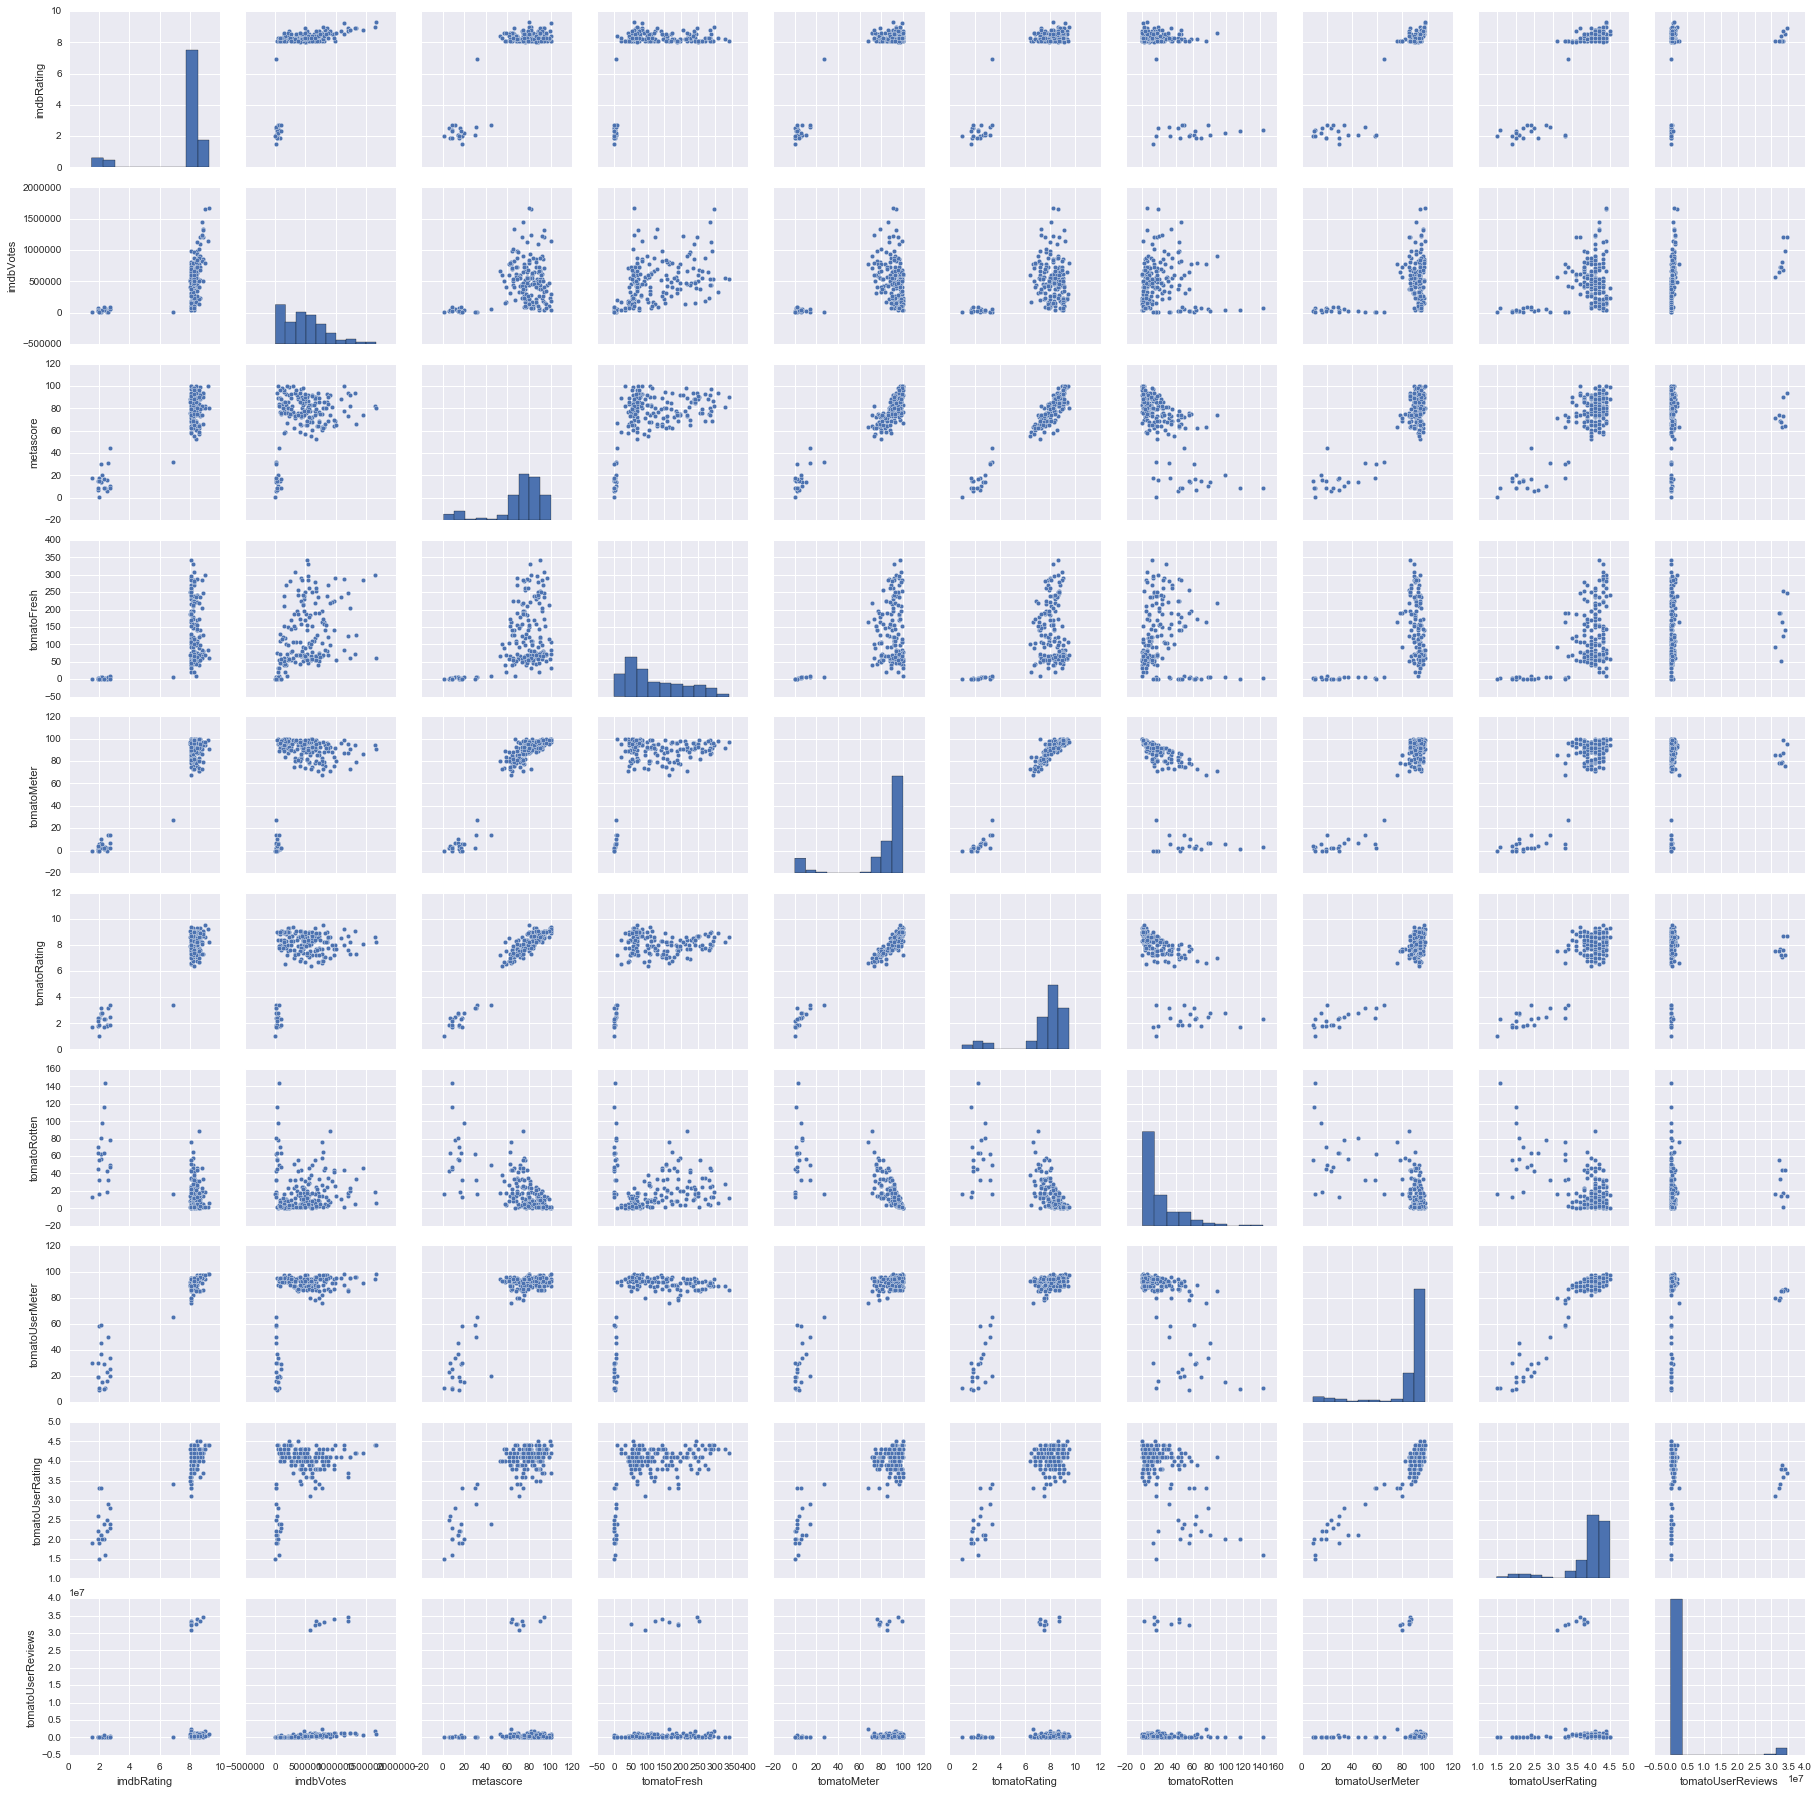

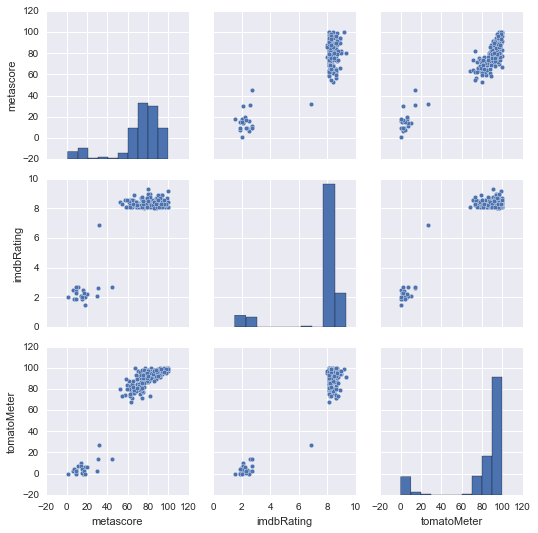

In [28]:
# Deciding which target variables to keep....

all_ratings = imdb_raw[['title','imdbRating', 'imdbVotes', 'metascore', 'tomatoFresh', \
            'tomatoMeter', 'tomatoRating', 'tomatoRotten', 'tomatoUserMeter', 'tomatoUserRating', 'tomatoUserReviews']]

all_rats_nonan = all_ratings.dropna()

sns.pairplot(all_rats_nonan)

meta_imdb = all_rats_nonan[['metascore','imdbRating','tomatoMeter']]
sns.pairplot(meta_imdb)

In [29]:
#based on pair plots above: metascore correlates with TomatoMeter, so I will drop metascore. Imdb votes is already 
#accounted for in imdb rating (according to documentation on IMDB site), so I will drop votes as well.
#any user ratings or reviews from rotten tomatoes site is for different set of critics than their tomatoMeter...
#for now, will only look at movie critic reviews from Rotten Tomatoes
#Also, tomato Fresh and rotten are accounted for in tomato meter, so will drop Fresh and Rotten columns also....

In [30]:
"""
Dropping the following columns/movie attributes from the analysis:

- Dropping Gross Revenue of movies because there are too many missing values (131/350)
- Dropping Country because of ambiguity (country(ies) of origin? country(ies) that showed movie?)
- Dropping Actors and Writer columns because I don't know how to handle large number of multi-class levels
- Any other columns dropped == Due to information overload...
"""

imdb_raw.drop(['country', 'Gross' ,'DVD', 'actors', 'plot','released','writer', 'imdbID','imdbVotes', 'metascore', 'tomatoFresh','tomatoRotten','tomatoUserMeter', 'tomatoUserRating', 'tomatoUserReviews', 'tomatoImage','tomatoRating','tomatoReviews','tomatoConsensus'], axis=1, inplace=True)
imdb_raw.head(1)

,Production,awards,director,genre,imdbRating,language,rating,runtime,title,tomatoMeter,year,lang_class,awards_num
0,TriStar Pictures,1 win & 2 nominations.,Bob Clark,"Comedy, Crime, Family",2.5,English,PG,97.0,Baby Geniuses,2.0,1999,1,0.0


In [31]:
#Saving cleaned dataframe as csv...

imdb_raw.to_csv('imdb_cleaned.csv', encoding='utf-8')